PCA, TRUNCATEDSVD, T-SNE, UMAP, AUTOENCODER.

AUTOENCODER

https://arxiv.org/pdf/2201.03898.pdf

In this chapter, we review techniques for dimensionality reduction. Out of many possibilities, this chapter focuses on three: PCA, T-SNE, and AutoEncoders; they offer different footsteps for reducing and may serve as a good template for understanding other methods. 


Dimension reduction methods play important roles in many machine learning models. To cite a few, to curb the curse of dimensionality, to visualize cluster data, and collaborative filtering recommender systems. Let's jump into the most iconic technique for dim reduction: `PCA`

`PCA` algorithm transforms an original matrix into Principal Components representing the observed variance. The first components retain and represent the highest variance. To calculate these components, the algorithm applies the eigendecomposition onto the covariance matrix of the original data; the highest eigenvalues spot components with the highest variance. Let's go over a hands-on.   


PCs can be calculated by eigen decomposition of the covariance matrix $C$ of the zero-centered covariance matrix $X$.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import svd_flip


X, y = load_iris(return_X_y=True)

In [2]:
X_mean = X - X.mean(axis=0)

n, m = X_mean.shape

covariance_matrix = np.dot(X_mean.T, X_mean) / (n-1)

In [11]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix) 

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectors 
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [12]:
X_pca = np.dot(X_mean, eig_vecs)

A similar result can be achieved 

In [13]:
pca_t = PCA()
X_pca__sklearn = pca_t.fit_transform(X)

In [14]:
pca_t.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [20]:
np.allclose(X_pca, X_pca__sklearn) 
# U or components matrix drops out with inverted signals.

False

In [16]:
from sklearn.utils.extmath import svd_flip

U, Sigma, Vh = np.linalg.svd(X_mean, 
      full_matrices=False,
      compute_uv=True)

U, Vt = svd_flip(U, Vh)

In [21]:
x_svd_pca = np.dot(U, np.diag(Sigma))

In [22]:
np.allclose(x_svd_pca, X_pca__sklearn) 

True

Truncated SVD Algorithm leverage SVD to derive great insights about the underlying structure of a matrix. Please, check out the LSA algorithm for NLP analysis.

## T-SNE

Contrary to PCA and TruncatedSVD, which aims to retain the maximum pairwise relation and distance, the T-SNE algorithm is prone to exploit local distances upon global ones. As the great wikipedia as article says:

'''
 First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate.
'''

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [30]:
from sklearn import datasets
from sklearn.manifold import TSNE


digits = datasets.load_digits()

In [29]:
print(digits.data.shape)
print(len(digits.images))

(1797, 64)
1797


In [58]:
%%time
X_embedded__perplexity_2 = TSNE(perplexity=2).fit_transform(digits.data)
X_embedded__perplexity_20 = TSNE(perplexity=20).fit_transform(digits.data)
X_embedded__perplexity_40 = TSNE(perplexity=40).fit_transform(digits.data)
X_embedded__perplexity_60 = TSNE(perplexity=60).fit_transform(digits.data)

CPU times: user 1min 42s, sys: 888 ms, total: 1min 43s
Wall time: 30.7 s


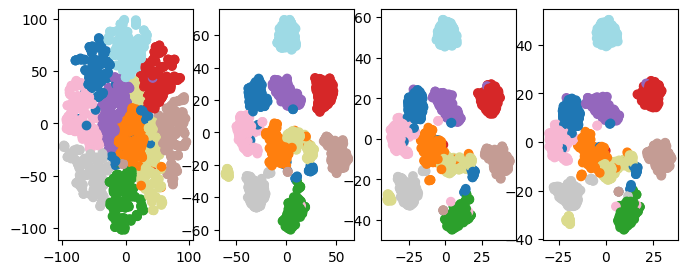

In [63]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 3), sharey=False)

ax1.scatter(X_embedded__perplexity_2[:,0], X_embedded__perplexity_2[:,1], c=digits.target, cmap="tab20_r")
ax2.scatter(X_embedded__perplexity_20[:,0], X_embedded__perplexity_20[:,1], c=digits.target, cmap="tab20_r")
ax3.scatter(X_embedded__perplexity_40[:,0], X_embedded__perplexity_40[:,1], c=digits.target, cmap="tab20_r")
ax4.scatter(X_embedded__perplexity_60[:,0], X_embedded__perplexity_60[:,1], c=digits.target, cmap="tab20_r")

## AutoEncoder

AUTOEncoder is when NNs meet the encoding-decoding philosophy, where an algorithm aims to reconstruct the entry/datum. Generally an encoding representation of input stems from many non-linear operations throughout layers, applied by activation functions.  


http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

In [65]:
import torch
from torchvision import datasets
from torchvision import transforms

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 9),
            torch.nn.ReLU(),
            torch.nn.Linear(9, 3)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3, 9),
            torch.nn.ReLU(),
            torch.nn.Linear(9, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        encoded = self.encoder(x)
        return encoded  

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [ ]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
       
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28*28)
       
        # Output of Autoencoder
        reconstructed = model(image)
       
        # Calculating the loss function
        loss = loss_function(reconstructed, image)
       
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
        # Storing the losses in a list for plotting
        losses.append(loss)
    outputs.append((epochs, image, reconstructed))